# Méthodologie et données - TD/AAG n°2



## Exercice 1 : Fréquence analogique et fréquence discrète

On suppose qu'un signal obtenu comme étant la somme de plusieurs sinusoïdes a été échantillonné à 12kHz. On traite les 500 premiers échantillons en effectuant une transformée de Fourier discrète (TFD) du bloc $s_e(n)$ sur $N=1024$ points. La TFD $S_e(k)$ contient des pics aux indices $k=40, 80, 924$ et $984$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.io.wavfile as wav
from IPython.display import Audio, display
from scipy.fft import fft, fft2, rfft, fftshift

**Q1** Charger le signal 'multifreq.wav'. Vérifier que la fréquence d'échantillonnage est bien 12kHz. Quelle est la durée du signal en secondes ?

In [3]:
value, fe = librosa.load("multifreq.wav", sr=None)

#Durée du signal
T = value.shape[0]/fe

print(T, value.shape[0], fe)

1.5 18000 12000


**Q2** Calculer la TFD du signal en suivant les consignes (vous utiliserez bien sûr la fonction fft) et afficher son module. Faire un schéma sur papier du résultat obtenu, en faisant figurer l'échelle fréquentielle en fréquence discrète $k$.

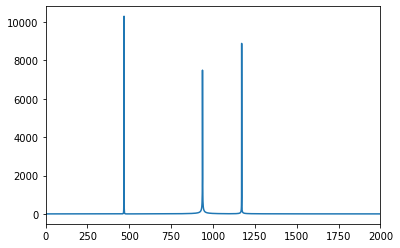

In [9]:
Y = fft(value)

freq = np.linspace(0, fe, len(Y))

plt.plot(freq, np.abs(Y))
plt.xlim([0, 2000])
plt.show()

**Q3** Quelle est la relation qui existe entre la fréquence $f$ en Hz et la fréquence discrète $k$ de la TFD ? Compléter votre graphique en exprimant l'axe des abscisses en fréquence réelle $f$ en Hz.

f = (sr*n)/len(y)

**Q4** Combien y a-t-il de sinusoïdes ? Quelles sont leurs fréquences réelles ?

**Q5** Rappeler une propriété du spectre en module, et ajuster votre échelle des fréquences en conséquence afin de ne visualiser que de l'information utile.

## Exercice 2 : TFD et fenêtrage

Dans de nombreux cas en traitement du signal, on doit se placer dans des conditions de quasi stationnarité pour effectuer une analyse du signal sur des trames d'une durée fixe. Pour cela, on effectue un fenêtrage du signal. Le signal fenêtré $x_w(n)$ est défini comme le produit du signal et de la fenêtre : $x_w(n) = x(n) \cdot w(n)$ où $x(n)$ est le signal à analyser et $w(n)$ la fenêtre d'observation de $K$ échantillons de valeur nulle en dehors de l'intervalle d'observation $[0, K-1]$

**Q1** Indiquer la relation théorique qui existe entre les TF continues $X(f)$, $W(f)$ et $X_w(f)$ des signaux discrets respectivement $x(n)$, $w(n)$, $x_w(n)$. En déduire la relation sur les TFD calculées sur les $K$ échantillons où la fenêtre est non nulle.

**Q2** Charger le signal 'etjelis.wav'. Indiquer la fréquence d'échantillonnage du signal et sa durée en seconde.

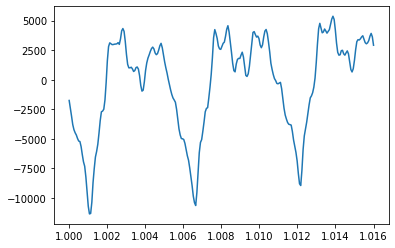

In [17]:
sr, y = wav.read('etjelis.wav')

plt.plot(np.linspace(1, 1+256/sr, 256), y[sr:sr+256])
plt.show()

**Q3** Récupérer la trame qui commence à $t=1$ sec. et qui contient $K=256$ échantillons. Quelle est sa durée ? Afficher la forme d'onde de la trame en indiquant l'axe temporel en secondes. Donner la période approximative en secondes observée sur cette trame.

**Q4** Calculer et afficher la TFD du signal fenêtré sur $M=K=256$ points, puis $M >> K$ (par exemple $M=2048$). Faites attention à l'échelle des fréquences.

Rappeler quelle est la TF continue d'une fenêtre carrée de largeur $M$, puis expliquer l'allure du spectre obtenu dans chaque cas. On pourra afficher seulement une partie du spectre, afin de pouvoir l'observer de façon précise à l'échantillon près. Donner la fréquence du premier pic observé. Retrouvez-vous la valeur calculée à la question Q2 ?

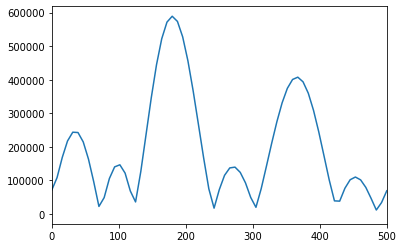

In [21]:
M = 2048
freq = np.linspace(0, sr, M)
Yw = np.abs(fft(y[sr:sr+256], M))
plt.plot(freq, Yw)
plt.xlim(0, 500)
plt.show()

**Q5** Ecrire un script qui permet de visualiser les formes et spectre en module des différentes fenêtres ci-dessous avec une taille de fenêtre de $K=256$ échantillons. Les spectres seront calculés avec $N=256$ puis $1024$ points.
* fenêtre rectangulaire
* fenêtre triangulaire
* fenêtre de Hamming
* fenêtre de Hanning

**Q6** Dans le cadre de l'analyse du signal 'etjelis.wav' quelle fenêtre conseillez-vous et pourquoi ?

## Exercice 3 : segmentation et spectrogramme.

Nous allons maintenant procéder à la segmentation complète du signal 'etjelis.wav' afin de préparer le calcul du spectrogramme.

**Q1** Construire une fonction qui prend en entrée un signal à une dimension, le découpe en trame de $K$ échantillons tous les $P$ échantillons. Cette fonction retournera un tableau contenant l'ensemble des trames en fonction du temps. Vos trames seront préalablement fenêtrées avec une fenêtre pertinente.

**Q2** Vous aurez sans doute remarquer que le découpage du signal en trame ne permet pas de tomber sur un nombre de trame entier. Deux options alors, soit vous ne prenez pas en compte la dernière trame incomplète, soit vous ajoutez des zéros pour la compléter (padding). Vous implémenterez le padding.

**Q3** Calculer la TFD de chaque trame sur $N= 256$ échantillons et construire une matrice contenant en ligne le temps, et en colonne les fréquences. Afficher ce spectrogramme et comparer-le avec la version de ` librosa`  donnée ci-dessous. Vous prendrez soin de choisir les bons paramètres pour le spectrogramme (les paramètres par défaut ne correspondent pas à ce que vous avez implémenté plus haut).

La documentation de `librosa` se trouve ici : https://librosa.org/doc/main/index.html

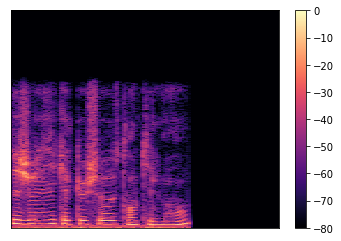

In [5]:
import librosa.display
ylib, sr = librosa.load('etjelis.wav')
D = librosa.stft(ylib)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()